In [ ]:
# Import necessary libraries
from google.colab import drive
import zipfile
import os

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Set the path to your zip file in Google Drive
# Replace 'path_to_your_zip_file_in_drive' with the actual path in your Google Drive
zip_file_path = '/content/drive/My Drive/New Plant Diseases Dataset.zip'

# Step 3: Unzip the file to a directory
extract_to = '/content/'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Verify the extraction by listing directories
extracted_folders = os.listdir(extract_to)
print("Extracted folders:", extracted_folders)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/New Plant Diseases Dataset.zip'

In [ ]:
train_dir = 'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
validation_dir = 'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:
# Import necessary libraries
from google.colab import drive
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


drive.mount('/content/drive')

data_path = '/content/New_Plant_Diseases_Dataset/a/'


train_dir = os.path.join(data_path, 'train')
validation_dir = os.path.join(data_path, 'valid')


train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)


model.save('/content/drive/My Drive/New_Plant_Disease_Model.h5')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 24047 images belonging to 13 classes.
Found 6011 images belonging to 13 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


751/751 ━━━━━━━━━━━━━━━━━━━━ 1599s 2s/step - accuracy: 0.3622 - loss: 1.8328 - val_accuracy: 0.6720 - val_loss: 1.2196
Epoch 2/10
  1/751 ━━━━━━━━━━━━━━━━━━━━ 18:43 1s/step - accuracy: 0.6250 - loss: 1.1245

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


751/751 ━━━━━━━━━━━━━━━━━━━━ 2s 555us/step - accuracy: 0.6250 - loss: 1.1245 - val_accuracy: 0.6667 - val_loss: 1.0038
Epoch 3/10
751/751 ━━━━━━━━━━━━━━━━━━━━ 1650s 2s/step - accuracy: 0.7943 - loss: 0.5947 - val_accuracy: 0.7854 - val_loss: 0.6952
Epoch 4/10
751/751 ━━━━━━━━━━━━━━━━━━━━ 2s 532us/step - accuracy: 0.8125 - loss: 0.3242 - val_accuracy: 0.8148 - val_loss: 0.7798
Epoch 5/10
751/751 ━━━━━━━━━━━━━━━━━━━━ 1644s 2s/step - accuracy: 0.8487 - loss: 0.4367 - val_accuracy: 0.8310 - val_loss: 0.5763
Epoch 6/10
751/751 ━━━━━━━━━━━━━━━━━━━━ 2s 534us/step - accuracy: 0.8438 - loss: 0.4128 - val_accuracy: 0.8519 - val_loss: 0.3796
Epoch 7/10
751/751 ━━━━━━━━━━━━━━━━━━━━ 1629s 2s/step - accuracy: 0.8797 - loss: 0.3494 - val_accuracy: 0.8387 - val_loss: 0.5837
Epoch 8/10
751/751 ━━━━━━━━━━━━━━━━━━━━ 2s 556us/step - accuracy: 0.9062 - loss: 0.2379 - val_accuracy: 0.9259 - val_loss: 0.2283
Epoch 9/10
751/751 ━━━━━━━━━━━━━━━━━━━━ 1616s 2s/step - accuracy: 0.8959 - loss: 0.3005 - val_accurac

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 24047 images belonging to 13 classes.
Found 6011 images belonging to 13 classes.


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


752/752 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9047 - loss: 0.2658
Epoch 1: val_accuracy improved from -inf to 0.89918, saving model to /content/drive/My Drive/Best_Plant_Disease_Model_Updated_latest.keras
752/752 ━━━━━━━━━━━━━━━━━━━━ 1460s 2s/step - accuracy: 0.9047 - loss: 0.2658 - val_accuracy: 0.8992 - val_loss: 0.2977
Epoch 2/50
752/752 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9118 - loss: 0.2523
Epoch 2: val_accuracy did not improve from 0.89918
752/752 ━━━━━━━━━━━━━━━━━━━━ 1473s 2s/step - accuracy: 0.9118 - loss: 0.2522 - val_accuracy: 0.8711 - val_loss: 0.4215
Epoch 3/50
752/752 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9222 - loss: 0.2242
Epoch 3: val_accuracy did not improve from 0.89918
752/752 ━━━━━━━━━━━━━━━━━━━━ 1494s 2s/step - accuracy: 0.9222 - loss: 0.2242 - val_accuracy: 0.8822 - val_loss: 0.4190
Epoch 4/50
752/752 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9366 - loss: 0.1845
Epoch 4: val_accuracy did not improve from 0.89918
752/752 ━━━━━━━━━━━━━━

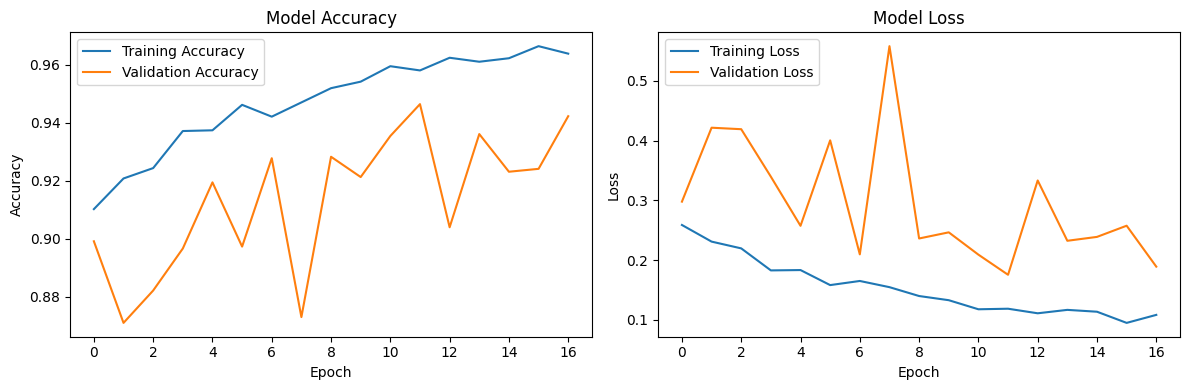

In [ ]:

from google.colab import drive
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, callbacks
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

drive.mount('/content/drive')


data_path = '/content/data/'

train_dir = os.path.join(data_path, 'train')
validation_dir = os.path.join(data_path, 'valid')

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


model = load_model('/content/drive/MyDrive/New_Plant_Disease_Model.h5')

num_classes = train_generator.num_classes
if model.output_shape[-1] != num_classes:
    model.layers[-1] = layers.Dense(num_classes, activation='softmax')

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

model_checkpoint = callbacks.ModelCheckpoint(
    '/content/drive/My Drive/Best_Plant_Disease_Model_Updated_latest.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)


history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

model.save('/content/drive/My Drive/Final_Updated_Plant_Disease_Model_latest.h5')

def plot_metrics(history):

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

plot_metrics(history)


In [ ]:
import os

# Set the path to your dataset
data_path = '/content/data/'
train_dir = os.path.join(data_path, 'train')
validation_dir = os.path.join(data_path, 'valid')

# Function to count the number of classes in a directory
def count_classes(directory):
    # List all subdirectories (classes)
    classes = os.listdir(directory)
    # Filter out any non-directory entries
    classes = [cls for cls in classes if os.path.isdir(os.path.join(directory, cls))]
    return len(classes), classes

# Count classes in training and validation directories
num_train_classes, train_classes = count_classes(train_dir)
num_valid_classes, valid_classes = count_classes(validation_dir)

# Output the results
print(f'Number of training classes: {num_train_classes}')
print('Training classes:', train_classes)
print(f'Number of validation classes: {num_valid_classes}')
print('Validation classes:', valid_classes)


Number of training classes: 13
Training classes: ['Potato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Target_Spot', 'Tomato___Septoria_leaf_spot', 'Tomato___Leaf_Mold', 'Tomato___healthy', 'Potato___healthy', 'Tomato___Late_blight', 'Tomato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Potato___Early_blight', 'Tomato___Spider_mites Two-spotted_spider_mite']
Number of validation classes: 13
Validation classes: ['Potato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Target_Spot', 'Tomato___Septoria_leaf_spot', 'Tomato___Leaf_Mold', 'Tomato___healthy', 'Potato___healthy', 'Tomato___Late_blight', 'Tomato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Potato___Early_blight', 'Tomato___Spider_mites Two-spotted_spider_mite']


Mounted at /content/drive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


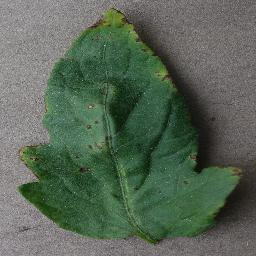

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import os

# Mount the drive if needed
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Path to your model file
model_path = '/content/drive/MyDrive/Final_Updated_Plant_Disease_Model_latest.h5'

# Verify if the file exists at the specified path
if not os.path.isfile(model_path):
    raise FileNotFoundError(f"Model file not found at: {model_path}")

# Load the trained model
model = load_model(model_path)

# Define the class names based on the provided data
class_names = [
    'Potato___Early_blight',
    'Potato___Late_blight',
    'Potato___healthy',
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]
Diseases = [
    'Early_blight',
    'Late_blight',
    'Bacterial_spot',
    'Early_blight',
    'Late_blight',
    'Leaf_Mold',
    'Septoria_leaf_spot',
    'Spider_mites Two-spotted_spider_mite',
    'Target_Spot',
    'Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato_mosaic_virus',
    'healthy'
]


model_input_shape = model.input_shape[1:3]

def predict_image_class(image_paths):
    predictions_list = []

    for image_path in image_paths:
        # Load image with the expected input size of the model
        img = load_img(image_path, target_size=model_input_shape)
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict the class for the current image
        predictions = model.predict(img_array)
        predictions_list.append(predictions)

    # Average predictions from all images
    avg_predictions = np.mean(predictions_list, axis=0)

    # Determine the predicted class
    predicted_class_index = np.argmax(avg_predictions)
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name


# Test the function with a list of image paths
test_image_paths = [
    '/content/2.JPG',
    '/content/2.JPG',
    '/content/2.JPG'


]


model_output_shape = model.output_shape
#print(f"Model output shape: {model_output_shape}")

def disease(x):
    x_lower = x.lower()
    found_diseases = []

    for disease in Diseases:
        if disease.lower() in x_lower:
            found_diseases.append(disease)

    found_diseases_string = ' '.join(disease.replace('_', ' ') for disease in found_diseases)

    return found_diseases_string

x=predict_image_class(test_image_paths)
from IPython.display import Image, display, HTML
def finder():
    if "tomato" in x.lower():
        display(Image(test_image_paths[1]))
        # Print the message in green color and centered
        display(HTML("<p style='color: green;'>Tomato Leaf Detected!!</p>"))
        result = disease(x)
        if "healthy" in result:
          display(HTML(f"<p style='color: green;'>{result}</p>"))
        else:
          display(HTML(f"<p style='color: red;'>{result}</p>"))

    else:
        display(Image(test_image_paths[1]))
        # Print the message in green color and centered
        display(HTML("<p style='color: green;'>Potato Leaf Detected!!</p>"))
        result = disease(x)
        if "healthy" in result:
          display(HTML(f"<p style='color: green;'>{result}</p>"))
        else:
          display(HTML(f"<p style='color: red;'>{result}</p>"))
finder()





In [ ]:

from google.colab import drive
drive.mount('/content/drive')

with open("app.py", "w") as f:
    f.write("""
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import os

# Load the trained model
model_path = '/content/drive/MyDrive/Final_Updated_Plant_Disease_Model_latest.h5'  # Update the path if needed
if not os.path.isfile(model_path):
    st.error(f"Model file not found at: {model_path}")
else:
    model = load_model(model_path)

# Define the class names based on the provided data
class_names = [
    'Potato___Early_blight',
    'Potato___Late_blight',
    'Potato___healthy',
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]
Diseases = [
    'healthy',
    'Bacterial_spot',
    'Early_blight',
    'Late_blight',
    'Leaf_Mold',
    'Septoria_leaf_spot',
    'Spider_mites Two-spotted_spider_mite',
    'Target_Spot',
    'Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato_mosaic_virus'
]

# Define the input shape for image resizing
model_input_shape = model.input_shape[1:3]  # Extract height and width from the input shape

def predict_image_class(image):
    # Load and preprocess the image
    img = load_img(image, target_size=model_input_shape)  # Adjust size based on model input size
    img_array = img_to_array(img) / 255.0  # Normalize the image to [0, 1] range
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension

    # Predict the class for the current image
    predictions = model.predict(img_array)

    # Determine the predicted class
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

def disease(x):
    x_lower = x.lower()
    found_diseases = []

    # Check for each disease in the list
    for disease in Diseases:
        if disease.lower() in x_lower:
            found_diseases.append(disease)  # Add to the found diseases list

    # Convert found diseases to a string without underscores
    found_diseases_string = ' '.join(disease.replace('_', ' ') for disease in found_diseases)

    return found_diseases_string

# Streamlit application layout
st.title("Plant Health Detector")
st.write("Upload at least 3 images of plant leaves to get the disease predictions.")

# Image upload
uploaded_files = st.file_uploader("Choose images...", type=["jpg", "jpeg", "png"], accept_multiple_files=True)
for uploaded_file in uploaded_files:
    filename = uploaded_file.name.lower().strip()

    # Extra filename validation
    if not filename.endswith(('.jpg', '.jpeg', '.png')):
        st.warning(f"Invalid file format for: {filename}")
        continue

if uploaded_files is not None:
    if len(uploaded_files) < 3:
        st.warning("Please upload at least 3 images.")
    else:
        # Initialize counters for detections
        tomato_detected = False
        potato_detected = False

        # Process each uploaded image
        for uploaded_file in uploaded_files:
            # Display the uploaded image


            # Make predictions
            x = predict_image_class(uploaded_file)

            # Check the prediction result
            if "tomato" in x.lower():
                tomato_detected = True

                st.image("https://t4.ftcdn.net/jpg/03/27/96/23/360_F_327962332_6mb5jQLnTOjhYeXML7v45Hc5eED2GYOD.jpg")
                st.success("Tomato  Detected!!")
            elif "potato" in x.lower():
                potato_detected = True

                st.image("https://t3.ftcdn.net/jpg/00/85/79/92/360_F_85799278_0BBGV9OAdQDTLnKwAPBCcg1J7QtiieJY.jpg")
                st.success("Potato  Detected!!")
            st.image(uploaded_file, caption='Uploaded Image.', use_container_width=True)
            # Display the prediction result
            result = disease(x)
            if "healthy" in result:
                st.success(result)
            else:
                st.error(result)
""")

from pyngrok import ngrok


ngrok.set_auth_token('your_Token')

port = 8501

public_url = ngrok.connect(port)
print(f"Access your Streamlit app at: {public_url}")

!streamlit run app.py & npx ngrok http 8505


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Access your Streamlit app at: NgrokTunnel: "https://5a57-34-126-129-83.ngrok-free.app" -> "http://localhost:8501"


⠙⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.126.129.83:8501

⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼ERROR:  authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.
ERROR:  You can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.
ERROR:  Read more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config
ERROR:  You can view your current agent sessions in the dashboard:
ERROR:  https://dashboard.ngrok.com/agents
ERROR:  
ERROR:  ERR_NGROK_108
ERROR:  https://ngr